In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv('covid data.csv')

In [3]:
df
# 1 yes 2 no 97 and 98 unknown

,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,CARDIOVASCULAR,OBESITY,TOBACCO,ICU,STATUS
0,97,1,72,2,2,2,1,2,97,Died
1,1,2,55,1,2,2,2,2,2,Died
2,97,2,68,1,2,2,2,2,97,Died
3,2,2,24,2,2,2,2,2,2,Cured
4,2,2,30,2,2,2,2,2,2,Cured
...,...,...,...,...,...,...,...,...,...,...
523506,97,2,40,2,2,2,2,2,97,Cured
523507,2,2,51,2,2,2,2,2,2,Cured
523508,97,2,55,2,2,2,2,2,97,Cured
523509,97,2,28,2,2,2,2,2,97,Cured


In [4]:
#Removing unknown values
for x in df.columns:
    df = df[df[x]!=97]
    df = df[df[x]!=98]
    df= df[df[x] != 99]

In [5]:
df

,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,CARDIOVASCULAR,OBESITY,TOBACCO,ICU,STATUS
1,1,2,55,1,2,2,2,2,2,Died
3,2,2,24,2,2,2,2,2,2,Cured
4,2,2,30,2,2,2,2,2,2,Cured
8,2,1,59,1,2,2,2,1,1,Cured
16,2,1,45,2,2,2,2,2,2,Cured
...,...,...,...,...,...,...,...,...,...,...
523481,2,1,26,2,2,2,2,2,2,Cured
523484,2,2,64,1,2,2,2,2,2,Cured
523486,2,1,50,1,2,2,1,2,2,Cured
523495,2,2,65,1,2,2,2,2,2,Cured


STATUS IS DEPENDENT AND THE REST INDEPENDENT

In [6]:
df['STATUS'] = df['STATUS'].apply(lambda x : x.replace('Cured', '1').replace('Died','0'))
df

,INTUBED,PNEUMONIA,AGE,DIABETES,ASTHMA,CARDIOVASCULAR,OBESITY,TOBACCO,ICU,STATUS
1,1,2,55,1,2,2,2,2,2,0
3,2,2,24,2,2,2,2,2,2,1
4,2,2,30,2,2,2,2,2,2,1
8,2,1,59,1,2,2,2,1,1,1
16,2,1,45,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
523481,2,1,26,2,2,2,2,2,2,1
523484,2,2,64,1,2,2,2,2,2,1
523486,2,1,50,1,2,2,1,2,2,1
523495,2,2,65,1,2,2,2,2,2,1


In [7]:
reg = linear_model.LinearRegression()

In [8]:
reg.fit(df[['INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'CARDIOVASCULAR',
       'OBESITY', 'TOBACCO', 'ICU']], df.STATUS)

LinearRegression()

In [9]:
reg.predict([[2,2,30,2,2,2,2,2,2]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.92484754])

In [10]:
reg.predict([[1,1,100,1,1,1,1,1,1]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.00831076])

In [11]:
reg.score(df[['INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'CARDIOVASCULAR',
       'OBESITY', 'TOBACCO', 'ICU']], df.STATUS)

0.25181747348437533

In [12]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
lf_r = RandomForestRegressor()
model2 = lf_r.fit(df[['INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'CARDIOVASCULAR',
       'OBESITY', 'TOBACCO', 'ICU']], df.STATUS)


In [13]:
model2.predict([[1,1,100,1,1,1,1,1,1]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.7])

In [14]:
model2.score(df[['INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'CARDIOVASCULAR',
       'OBESITY', 'TOBACCO', 'ICU']], df.STATUS)

0.3005134394900316

In [15]:
model2.predict([[2,2,30,2,2,2,2,2,2]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.95243476])

In [16]:
#LInear regression with cross validation

In [17]:
df.columns

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'DIABETES', 'ASTHMA', 'CARDIOVASCULAR',
       'OBESITY', 'TOBACCO', 'ICU', 'STATUS'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split as ttt
x = df.drop('STATUS', axis = 1)
y = df.STATUS.values
X_train,X_test,y_train,y_test = ttt(x,y ,test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores = cross_val_score(lr,X_train,y_train, scoring = 'neg_mean_absolute_error')
scores


array([-0.35692857, -0.35487998, -0.35745313, -0.35700448, -0.36142288])

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.predict([[2,2,30,2,2,2,2,2,2]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.92484537])

In [22]:
lr.predict([[1,1,100,1,1,1,1,1,1]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.0079595])

In [23]:

lr.score(X_test,y_test)

0.24865664416001387

In [24]:
#25 % accurate

In [25]:
from sklearn.model_selection import train_test_split as ttt
from sklearn.linear_model import LogisticRegression 
lgr =  LogisticRegression()
model3 = lgr.fit(X_train,y_train)
model3

/home/cipher/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model3.predict([[2,2,30,2,2,2,2,2,2]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [27]:
model3.predict([[1,1,100,1,1,1,1,1,1]])

/home/cipher/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

In [28]:
model3.score(X_test,y_test)

0.7364999336606076

In [41]:
y_predicted = model3.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 4168,  4451],
       [ 1507, 12485]])

Text(95.72222222222221, 0.5, 'Truth')

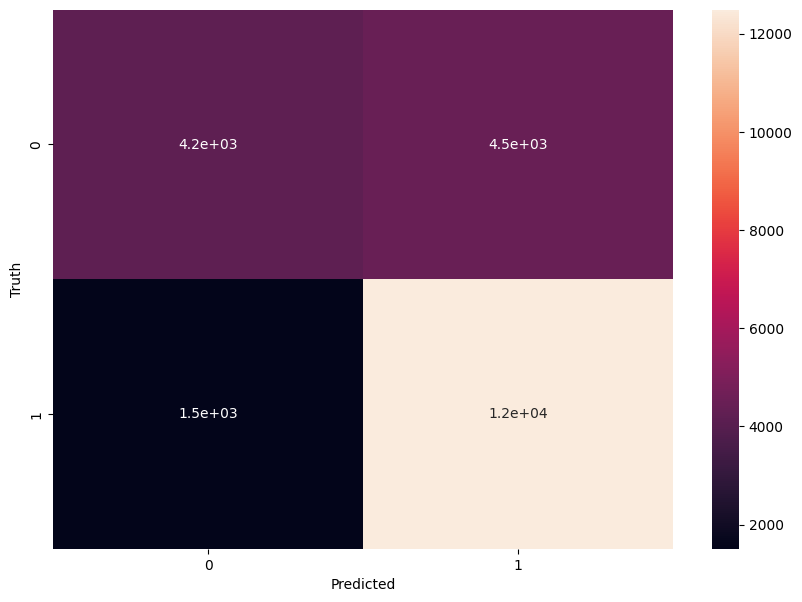

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm ,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')